<a href="https://colab.research.google.com/github/ali-talebi/norouz1404/blob/main/autoencoders_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURED.zip

Archive:  /content/drive/MyDrive/Malek_Master/code/DATA_PICTURED.zip
   creating: DATA_PICTURED/
   creating: DATA_PICTURED/picture_alpha/
  inflating: DATA_PICTURED/picture_alpha/alpha_0.001_void_0.1.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.001_void_0.2.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.001_void_0.3.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.001_void_0.4.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.002_void_0.1.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.002_void_0.2.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.002_void_0.3.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.002_void_0.4.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.003_void_0.1.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.003_void_0.2.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.003_void_0.3.csv  
  inflating: DATA_PICTURED/picture_alpha/alpha_0.003_void_0.4.csv  
  inflating: DATA_PICTURED/picture_alpha/alph

In [3]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 30.6 MB/s eta 0:00:00


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Flatten , Conv2DTranspose , Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import visualkeras

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_data = "/content/DATA_PICTURED"

store_data_set = {
					'picture_alpha':[] ,
					'picture_health' : [] ,
					'picture_void' : [] ,
					'picture_void_alpha' : []
				}

def function_conver_and_load_image() :
  for path in os.listdir(path_data) :
    print(path)
    cursur = None
    if path == 'picture_alpha' :
      cursur = 'picture_alpha'
    elif path == 'picture_health' :
      cursur = 'picture_health'
    elif path == 'picture_void' :
      cursur = 'picture_void'
    elif path == 'picture_void_alpha' :
      cursur = 'picture_void_alpha'

    for file in os.listdir(f'{path_data}/{path}') :
      combined_root = f'{path_data}/{path}/{file}'
      print(combined_root)
      df = pd.read_csv(combined_root)
      matrix_picture = []
      for index in range(len(df)) :
        value = df.iloc[index , 2 ]
        matrix_picture.append(value)

      matrix_picture = np.array(matrix_picture).reshape(16,3)
      store_data_set[cursur].append(matrix_picture)


  return store_data_set
store_data_set = function_conver_and_load_image()



picture_health
/content/DATA_PICTURED/picture_health/h_0.017_void_0.1.csv
/content/DATA_PICTURED/picture_health/h_0.073_void_0.1.csv
/content/DATA_PICTURED/picture_health/h_0.073_void_0.3.csv
/content/DATA_PICTURED/picture_health/h_0.007_void_0.3.csv
/content/DATA_PICTURED/picture_health/h_0.06_void_0.3.csv
/content/DATA_PICTURED/picture_health/h_0.019_void_0.2.csv
/content/DATA_PICTURED/picture_health/h_0.031_void_0.1.csv
/content/DATA_PICTURED/picture_health/h_0.016_void_0.1.csv
/content/DATA_PICTURED/picture_health/h_0.059_void_0.1.csv
/content/DATA_PICTURED/picture_health/h_0.088_void_0.1.csv
/content/DATA_PICTURED/picture_health/h_0.013_void_0.4.csv
/content/DATA_PICTURED/picture_health/h_0.052_void_0.3.csv
/content/DATA_PICTURED/picture_health/h_0.082_void_0.4.csv
/content/DATA_PICTURED/picture_health/h_0.068_void_0.4.csv
/content/DATA_PICTURED/picture_health/h_0.058_void_0.3.csv
/content/DATA_PICTURED/picture_health/h_0.053_void_0.2.csv
/content/DATA_PICTURED/picture_health/h_0.

In [6]:
x , y = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      x.append(img)
      y.append(i)



In [7]:
x = np.array(x).reshape(-1 , 16 , 3 , 1 )

In [8]:
len(x)

387

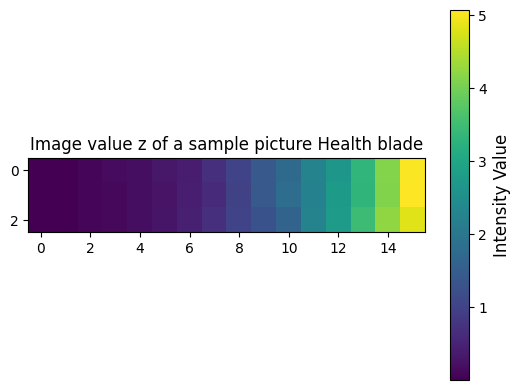

[[4.58445764e-03 1.80656453e-02 1.13734643e-02]
 [1.46522960e-02 8.07539934e-03 6.77261156e-03]
 [8.51850850e-02 8.51083059e-02 6.54391960e-02]
 [1.13622287e-01 1.07971046e-01 1.52497724e-01]
 [1.93471105e-01 1.98032887e-01 1.92602416e-01]
 [2.84492092e-01 2.69451322e-01 3.32196694e-01]
 [4.46595753e-01 4.21097866e-01 4.14134323e-01]
 [6.98687926e-01 6.26209498e-01 6.89643655e-01]
 [1.02948626e+00 9.93596615e-01 1.02207792e+00]
 [1.27796396e+00 1.40946579e+00 1.41948313e+00]
 [1.61880307e+00 1.80468655e+00 1.74495204e+00]
 [2.26526156e+00 2.22968352e+00 2.26092060e+00]
 [2.77888954e+00 2.77024989e+00 2.68459486e+00]
 [3.47822694e+00 3.32470567e+00 3.33701886e+00]
 [4.23213941e+00 4.10047803e+00 4.11981455e+00]
 [4.82218603e+00 5.06714386e+00 5.02866112e+00]]


In [9]:
import matplotlib.colors
rotated_data = np.rot90(x[0][ : , : , 0 ])
img = plt.imshow(rotated_data ,  cmap='viridis'  )
cbar = plt.colorbar(img,)
cbar.set_label('Intensity Value', fontsize=12)
plt.title('Image value z of a sample picture Health blade')
plt.show()
print(x[0][ : , : , 0 ])

In [10]:
x_train , x_test = train_test_split(x , test_size = 0.3 , random_state = 42 )
x_train /= 255.0
x_test /= 255.0

In [13]:
input_shape = (16, 3, 1)
latent_dim = 8

# ---- Encoder ----
inputs = Input(shape=input_shape)

x = Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='sigmoid')(inputs)
# Output: (8, 2, 16)

x = Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='sigmoid')(x)
# Output: (4, 1, 32)

bottleneck = Conv2D(latent_dim, (4, 1), padding='valid', activation='sigmoid')(x)
# Output: (1, 1, latent_dim)

# ---- Decoder ----
x = Conv2DTranspose(32, (4, 1), padding='valid', activation='sigmoid')(bottleneck)
# Output: (4, 1, 32)

# تنظیم دقیق با output_shape
x = Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same', activation='sigmoid')(x)
# Output: (8, 2, 16)

# تنظیم دقیق خروجی به (16, 3, 1)
x = Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', activation='sigmoid')(x)

# ⚠️ اینجا اضافه می‌کنیم: Crop یا Slice برای حذف عرض اضافی
x = x[:, :16, :3, :]  # برش دقیق به ابعاد (16, 3, 1)

# ---- Autoencoder ----
autoencoder = Model(inputs, x)
autoencoder.compile(optimizer='adam', loss='mse' , metrics =['mse'])

# خلاصه مدل
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 16, 3, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 2, 16)       │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 1, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 1, 8)        │         1,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 4, 1, 32)       │         1,056 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 8, 2, 16)       │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 16, 4, 1)       │           145 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ get_item_1 (GetItem)            │ (None, 16, 3, 1)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,657 (45.54 KB)

 Trainable params: 11,657 (45.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
learned = autoencoder.fit(x_train , x_train , epochs =100 , batch_size = 1 , validation_split=0.2 )

Epoch 1/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1232 - mse: 0.1232 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 2/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 6.8674e-04 - val_mse: 6.8674e-04
Epoch 5/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.1776e-04 - mse: 6.1776e-04 - val_loss: 4.5357e-04 - val_mse: 4.5357e-04
Epoch 6/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1592e-04 - mse: 4.1592e-04 - val_loss: 3.2268e-04 - val_mse: 3.2268e-04
Epoch 7/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0017e-04 - mse: 3.0017e-04 - val_loss: 2.4283e-04 - val_mse: 2.4283e-04
Epoch 8/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2832e-04 - mse: 2.2832e-04 - val_loss: 1.9108e-0

In [15]:
x_train[0].shape
t = []
t.append(x_train[0])
t = np.array(t)

In [16]:
result = autoencoder.predict(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [17]:
result.shape

(1, 16, 3, 1)

In [18]:
t.shape

(1, 16, 3, 1)

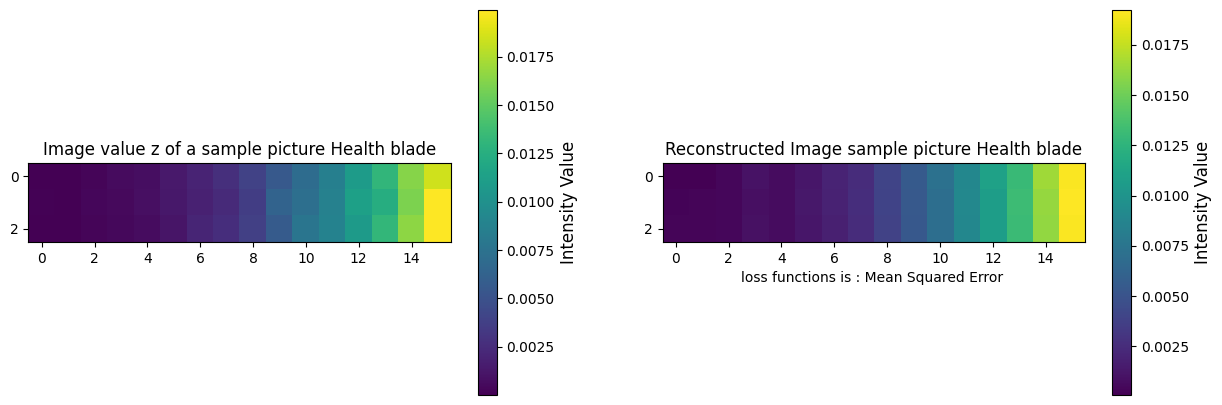

In [19]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1 , 2 , 1 )
ax2 = fig.add_subplot(1 , 2 , 2 )
rotated_data = np.rot90(x_train[0][ : , : , 0 ])
img = ax1.imshow(rotated_data ,  cmap='viridis'  )
cbar = plt.colorbar(img,)
cbar.set_label('Intensity Value', fontsize=12)
ax1.set_title('Image value z of a sample picture Health blade')

rotated_data = np.rot90(result[0][ : , : , 0 ])
img = ax2.imshow(rotated_data ,  cmap='viridis'  )
cbar = plt.colorbar(img,)
cbar.set_label('Intensity Value', fontsize=12)
ax2.set_title('Reconstructed Image sample picture Health blade')
ax2.set_xlabel("loss functions is : Mean Squared Error ")
plt.show()



In [32]:
x_train.shape

(270, 16, 3, 1)

In [33]:
x_fault_alpha , y_fault_alpha = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_void' :
      x_fault_alpha.append(img)
      y_fault_alpha.append(i)



In [34]:
len(x_fault_alpha)

387

In [35]:
x_fault_alpha = np.array(x_fault_alpha).reshape(-1 , 16 , 3 ,1  )

In [36]:
test = []
test.append(x_fault_alpha[0])
test = np.array(test)

In [37]:
test.shape

(1, 16, 3, 1)

In [38]:
y_pre_test = autoencoder.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


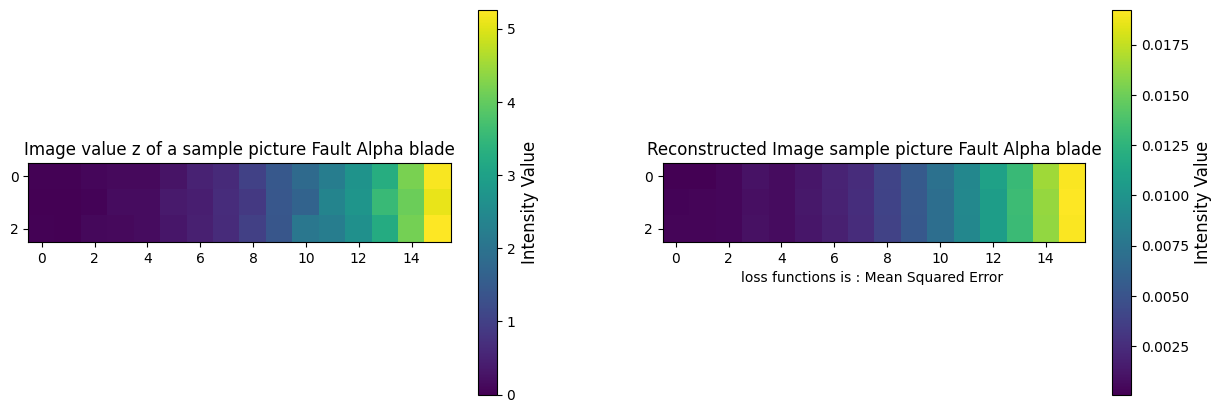

In [39]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1 , 2 , 1 )
ax2 = fig.add_subplot(1 , 2 , 2 )
rotated_data = np.rot90(x_fault_alpha[0][ : , : , 0 ])
img = ax1.imshow(rotated_data ,  cmap='viridis'  )
cbar = plt.colorbar(img,)
cbar.set_label('Intensity Value', fontsize=12)
ax1.set_title('Image value z of a sample picture Fault Alpha blade')

rotated_data = np.rot90(y_pre_test[0][ : , : , 0 ])
img = ax2.imshow(rotated_data ,  cmap='viridis'  )
cbar = plt.colorbar(img,)
cbar.set_label('Intensity Value', fontsize=12)
ax2.set_title('Reconstructed Image sample picture Fault Alpha blade')
ax2.set_xlabel("loss functions is : Mean Squared Error ")
plt.show()



In [40]:
t = x_fault_alpha[0] - y_pre_test[0]

In [41]:
t.shape

(16, 3, 1)

In [42]:
s = 0
for i in range(t.shape[0]) :
  for j in range(t.shape[1]) :
    for k in range(t.shape[2]) :
      s += t[i , j , k  ]

In [45]:
MSE_FOR_HEALTH = []
for i in range(len(x_train)) :
  test = []
  test.append(x_train[i])
  test = np.array(test)
  y_pre_test = autoencoder.predict(test)
  s  = 0
  t = x_train[i] - y_pre_test[0]
  for i1 in range(t.shape[0]) :
    for i2 in range(t.shape[1]) :
      for i3 in range(t.shape[2]) :
        s += t[i1 , i2 , i3  ] ** 2
  MSE_FOR_HEALTH.append(s)







1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

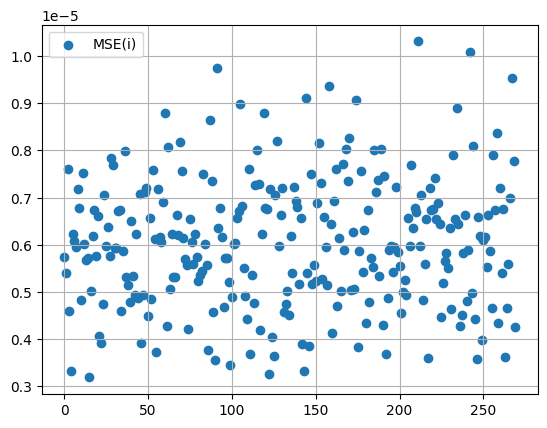

In [46]:
plt.scatter(range(len(MSE_FOR_HEALTH)) , MSE_FOR_HEALTH , label="MSE(i)")
plt.legend()
plt.grid()
plt.show()

In [62]:
avg = 0
for i in MSE_FOR_HEALTH :
  avg += i

avg2 = avg/len(MSE_FOR_HEALTH)

print(round(avg2 , 5 ))

1e-05


In [47]:
MSE_FOR_void = []
for i in range(len(x_fault_alpha)) :
  test = []
  test.append(x_fault_alpha[i])
  test = np.array(test)
  y_pre_test = autoencoder.predict(test)
  s  = 0
  t = x_fault_alpha[i] - y_pre_test[0]
  for i1 in range(t.shape[0]) :
    for i2 in range(t.shape[1]) :
      for i3 in range(t.shape[2]) :
        s += t[i1 , i2 , i3  ] ** 2
  MSE_FOR_void.append(s)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

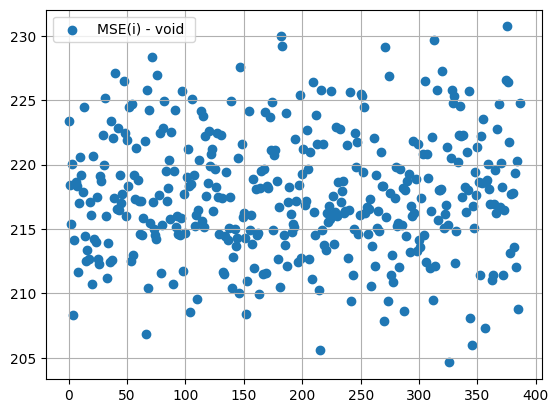

In [48]:
plt.scatter(range(len(MSE_FOR_void)) , MSE_FOR_void , label="MSE(i) - void ")
plt.legend()
plt.grid()
plt.show()

In [49]:
x_fault_alpha , y_fault_alpha = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_alpha' :
      x_fault_alpha.append(img)
      y_fault_alpha.append(i)

In [50]:
x_fault_alpha = np.array(x_fault_alpha).reshape(-1 , 16 , 3 , 1 )

In [52]:
MSE_FOR_alpha = []
for i in range(len(x_fault_alpha)) :
  test = []
  test.append(x_fault_alpha[i])
  test = np.array(test)
  y_pre_test = autoencoder.predict(test)
  s  = 0
  t = x_fault_alpha[i] - y_pre_test[0]
  for i1 in range(t.shape[0]) :
    for i2 in range(t.shape[1]) :
      for i3 in range(t.shape[2]) :
        s += t[i1 , i2 , i3  ] ** 2
  MSE_FOR_alpha.append(s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━

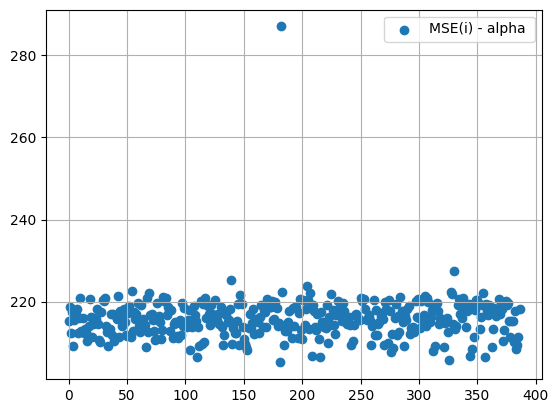

In [53]:
plt.scatter(range(len(MSE_FOR_alpha)) , MSE_FOR_alpha , label="MSE(i) - alpha ")
plt.legend()
plt.grid()
plt.show()